<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200> 

# Assignment:

- Replicate the lesson code.

 - This means that if you haven't followed along already, type out the things that we did in class. Forcing your fingers to hit each key will help you internalize the syntax of what we're doing. Make sure you understand each line of code that you're writing, google things that you don't fully understand.
 - [Lambda Learning Method for DS - By Ryan Herr](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit?usp=sharing)
- Convert the `term` column from string to integer.
- Make a column named `loan_status_is_great`. It should contain the integer 1 if `loan_status` is "Current" or "Fully Paid." Else it should contain the integer 0.
- Make `last_pymnt_d_month` and `last_pymnt_d_year` columns.

In [1]:
# Get LendingClub data
!wget https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip

--2019-11-02 01:16:02--  https://resources.lendingclub.com/LoanStats_2018Q4.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2018Q4.csv.zip’

LoanStats_2018Q4.cs     [           <=>      ]  21.66M   408KB/s    in 54s     

2019-11-02 01:16:57 (412 KB/s) - ‘LoanStats_2018Q4.csv.zip’ saved [22709125]



In [2]:
# Unzip de file
!unzip LoanStats_2018Q4.csv.zip

Archive:  LoanStats_2018Q4.csv.zip
  inflating: LoanStats_2018Q4.csv    


In [3]:
# Take a look to the data
!head LoanStats_2018Q4.csv

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_act_il","op

In [4]:
!tail LoanStats_2018Q4.csv

"","","5600","5600","5600"," 36 months"," 13.56%","190.21","C","C1","","n/a","RENT","15600","Not Verified","Oct-2018","Current","n","","","credit_card","Credit card refinancing","836xx","ID","15.31","0","Aug-2012","0","","97","9","1","5996","34.5%","11","w","3978.52","3978.52","2271.97","2271.97","1621.48","650.49","0.0","0.0","0.0","Oct-2019","190.21","Nov-2019","Oct-2019","0","","1","Individual","","","","0","0","5996","0","0","0","1","20","0","","0","2","3017","35","17400","1","0","0","3","750","4689","45.5","0","0","20","73","13","13","0","13","","20","","0","3","5","4","4","1","9","10","5","9","0","0","0","0","100","25","1","0","17400","5996","8600","0","","","","","","","","","","","","N","","","","","","","","","","","","","","","N","","","","","",""
"","","23000","23000","23000"," 36 months"," 15.02%","797.53","C","C3","Tax Consultant","10+ years","MORTGAGE","75000","Source Verified","Oct-2018","Charged Off","n","","","debt_consolidation","Debt consolidation","352xx","AL","20.9

In [5]:
# Load LendingClub data
import pandas as pd

df = pd.read_csv('LoanStats_2018Q4.csv', skiprows=1, skipfooter=2, engine='python')
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,35000,35000,35000.0,36 months,14.47%,1204.23,C,C2,Staff Physician,8 years,MORTGAGE,360000.0,Verified,Dec-2018,Fully Paid,n,NaN,NaN,credit_card,Credit card refinancing,336xx,FL,19.90,0,Apr-1995,1,NaN,NaN,24,0,57259,43.2%,51,w,0.00,0.00,38187.046837,38187.05,...,30.8,0,0,1222051,169286,124600,258401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,5000,5000,5000.0,36 months,22.35%,191.86,D,D5,Director of Sales,10+ years,MORTGAGE,72000.0,Source Verified,Dec-2018,Fully Paid,n,NaN,NaN,debt_consolidation,Debt consolidation,333xx,FL,20.12,0,Mar-2010,0,NaN,NaN,13,0,11720,47.1%,26,f,0.00,0.00,5615.977674,5615.98,...,50.0,0,0,218686,34418,18200,37786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,10000,10000,10000.0,60 months,23.40%,284.21,E,E1,NaN,< 1 year,RENT,55000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,902xx,CA,13.51,0,Apr-2007,0,44.0,88.0,9,1,11859,53.9%,11,w,9025.41,9025.41,2822.600000,2822.60,...,100.0,1,0,34386,21235,10500,12386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,17100,17100,17100.0,36 months,18.94%,626.30,D,D2,Receptionist,10+ years,RENT,38000.0,Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,150xx,PA,38.09,0,Mar-1998,1,47.0,NaN,14,0,15323,53%,21,w,13271.86,13271.86,6236.010000,6236.01,...,75.0,0,0,70954,43351,16600,41784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,4000,4000,4000.0,36 months,10.72%,130.43,B,B2,Extrusion assistant,10+ years,MORTGAGE,56000.0,Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,301xx,GA,31.03,0,Sep-2006,0,NaN,NaN,7,0,4518,28.6%,11,w,3014.03,3014.03,1291.210000,1291.21,...,0.0,0,0,221310,71375,12300,77865,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# print the shape of the file and the columns of the database
print(df.shape)
print(df.columns)

(128412, 144)
Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'orig_projected_additional_accrued_interest',
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term'],
      dtype='object', length=144)


In [0]:
# Change the option display 
pd.options.display.max_rows=999
pd.options.display.max_columns=100

In [10]:
# Look for missing data
df.isnull().sum().sort_values(ascending=False)

id                                            128412
desc                                          128412
member_id                                     128412
url                                           128412
orig_projected_additional_accrued_interest    128283
hardship_type                                 128276
hardship_last_payment_amount                  128276
hardship_payoff_balance_amount                128276
hardship_reason                               128276
hardship_loan_status                          128276
hardship_dpd                                  128276
hardship_length                               128276
payment_plan_start_date                       128276
hardship_end_date                             128276
hardship_start_date                           128276
hardship_amount                               128276
deferral_term                                 128276
hardship_status                               128276
settlement_percentage                         

In [12]:
# See data types of the columns
df.dtypes

id                                            float64
member_id                                     float64
loan_amnt                                       int64
funded_amnt                                     int64
funded_amnt_inv                               float64
term                                           object
int_rate                                       object
installment                                   float64
grade                                          object
sub_grade                                      object
emp_title                                      object
emp_length                                     object
home_ownership                                 object
annual_inc                                    float64
verification_status                            object
issue_d                                        object
loan_status                                    object
pymnt_plan                                     object
url                         

In [13]:
# data type of int_rate is object. Take a look to the data
df['int_rate'].head()

0     14.47%
1     22.35%
2     23.40%
3     18.94%
4     10.72%
Name: int_rate, dtype: object

In [14]:
# the value of first cell in the column
int_rate0 = df.loc[0, 'int_rate']
print(int_rate0)
int_rate0

 14.47%


' 14.47%'

In [16]:
# remove the space before number
int_rate0.strip()

'14.47%'

In [17]:
# remove the "%" sign
int_rate0.strip('%')

' 14.47'

In [19]:
# remove both space and percent sign on the same line
int_rate0.strip().strip('%')

'14.47'

In [20]:
# see pandas version
pd.__version__

'0.25.2'

In [21]:
# Convert from string to float
float(int_rate0.strip().strip('%'))

14.47

In [22]:
# verify the type
print (type(int_rate0.strip().strip('%')))
print(type(float(int_rate0.strip().strip('%'))))

<class 'str'>
<class 'float'>


In [23]:
# Define a function to remove spaces in the beginnning/end of the string, plus remove the percent sign and convert string to float
def int_rate_2_float(mystring):
  return float(mystring.strip().strip('%'))

# test the function
int_rate_2_float(int_rate0)

14.47

In [24]:
# Convert int_rate column to float
df['in_rate_float']=df['int_rate'].apply(int_rate_2_float)
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term', 'in_rate_float'],
      dtype='object', length=145)

In [26]:
# Compare old and new columns
df[['int_rate', 'in_rate_float']].head()

,int_rate,in_rate_float
0,14.47%,14.47
1,22.35%,22.35
2,23.40%,23.40
3,18.94%,18.94
4,10.72%,10.72


In [27]:
# Do some math on column
df['int_rate_double'] = df['in_rate_float']*2
df[['int_rate', 'in_rate_float', 'int_rate_double']].sample(3)

,int_rate,in_rate_float,int_rate_double
30807,6.46%,6.46,12.92
83852,13.56%,13.56,27.12
36037,18.94%,18.94,37.88


In [32]:
# Take a look at emp_title column
df[['emp_title', 'int_rate']].sample(5)

,emp_title,int_rate
84565,Administrator Specialist,13.56%
15115,Senior Project Manager,19.92%
71001,Golf Tour Director,10.33%
111796,NaN,7.21%
42805,Financial Services Manager II,18.94%


In [33]:
# See the number of all possible titles
df['emp_title'].nunique()

43892

In [34]:
# Show the most popular titles
df['emp_title'].value_counts(ascending=False, dropna=False).head()

NaN                 20947
Teacher              2090
Manager              1773
Registered Nurse      952
Driver                924
Name: emp_title, dtype: int64

In [35]:
# How many null values?
df['emp_title'].isnull().sum()

20947

In [36]:
# how many not null values?
df['emp_title'].notnull().sum()

107465

In [37]:
# Check the type of missing values
import numpy as np
type(np.NaN)

float

In [38]:
# Write a function to clean up the titles
def clean_title(title):
  if isinstance(title, str):
    return title.strip().title()
  else:
    return 'Unknown'

# Test the function
examples = ['owner', ' Supervisor', 'manager ', np.NaN]

for item in examples:
  print(clean_title(item))

Owner
Supervisor
Manager
Unknown


In [39]:
# Apply the function to the emp_title column
df['emp_title_clean'] = df['emp_title'].apply(clean_title)
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'debt_settlement_flag', 'debt_settlement_flag_date',
       'settlement_status', 'settlement_date', 'settlement_amount',
       'settlement_percentage', 'settlement_term', 'in_rate_float',
       'int_rate_double', 'emp_title_clean'],
      dtype='object', length=147)

In [40]:
# Compare old and new columns
df[['emp_title', 'emp_title_clean']].head()

,emp_title,emp_title_clean
0,Staff Physician,Staff Physician
1,Director of Sales,Director Of Sales
2,NaN,Unknown
3,Receptionist,Receptionist
4,Extrusion assistant,Extrusion Assistant


In [41]:
# Check for missing values
df['emp_title_clean'].isnull().sum()

0

In [42]:
# Check again the value counts
df['emp_title_clean'].value_counts(ascending=False).head()

Unknown             20947
Teacher              2557
Manager              2395
Registered Nurse     1418
Driver               1258
Name: emp_title_clean, dtype: int64

In [43]:
# Create emp_title_manager
df['emp_title_manager']=df['emp_title_clean'].str.contains('Manager')
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term',
       'in_rate_float', 'int_rate_double', 'emp_title_clean',
       'emp_title_manager'],
      dtype='object', length=148)

In [49]:
# Compare old and new columns
df[['emp_title_clean', 'emp_title_manager']].sample(6)

,emp_title_clean,emp_title_manager
103503,Facilty Revenues Technician,False
87825,Faciliyties Manager,True
12351,Unknown,False
43376,Office Mgr,False
80418,Electrician And Instrumentation Tech,False
123304,Branch Manager,True


In [50]:
# Check for missing values
df['emp_title_manager'].isnull().sum()

0

In [51]:
# Check columns that are dates
for col in df.columns:
  if (col.endswith('_d')) or (col.endswith('_date')):
    print(col)

issue_d
last_pymnt_d
next_pymnt_d
last_credit_pull_d
hardship_start_date
hardship_end_date
payment_plan_start_date
debt_settlement_flag_date
settlement_date


In [53]:
# another way to write it
date_col_list = [col for col in df.columns if (col.endswith('_d')) or (col.endswith('_date'))]
print (date_col_list)

['issue_d', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'debt_settlement_flag_date', 'settlement_date']


In [54]:
# Data type of these columns
df['issue_d'].dtype

dtype('O')

In [55]:
# Look at some values
df.loc[0:10, 'issue_d']

0     Dec-2018
1     Dec-2018
2     Dec-2018
3     Dec-2018
4     Dec-2018
5     Dec-2018
6     Dec-2018
7     Dec-2018
8     Dec-2018
9     Dec-2018
10    Dec-2018
Name: issue_d, dtype: object

In [56]:
# Convert strings to dates
df['issue_d_clean']=pd.to_datetime(df['issue_d'], infer_datetime_format=True)

# Compare old and new columns
df[['issue_d', 'issue_d_clean']].sample(5)

,issue_d,issue_d_clean
73299,Nov-2018,2018-11-01
124166,Oct-2018,2018-10-01
100015,Oct-2018,2018-10-01
84724,Oct-2018,2018-10-01
107368,Oct-2018,2018-10-01


In [57]:
# Check the type
df['issue_d_clean'].dtype

dtype('<M8[ns]')

In [58]:
# Create a new column based on date column
df['year']=df['issue_d_clean'].dt.year

df[['issue_d_clean', 'year']].sample(6)

,issue_d_clean,year
66666,2018-11-01,2018
28494,2018-12-01,2018
98310,2018-10-01,2018
67188,2018-11-01,2018
62126,2018-11-01,2018
9274,2018-12-01,2018


In [59]:
# Month column
df['month']=df['issue_d_clean'].dt.month
df[['issue_d_clean', 'year', 'month']].sample(5)

,issue_d_clean,year,month
60483,2018-11-01,2018,11
47594,2018-11-01,2018,11
84332,2018-10-01,2018,10
104902,2018-10-01,2018,10
21093,2018-12-01,2018,12


In [60]:
# Weekday
df['weekday']=df['issue_d_clean'].dt.weekday
df[['issue_d_clean', 'year', 'month', 'weekday']].sample(6)

,issue_d_clean,year,month,weekday
61496,2018-11-01,2018,11,3
75607,2018-11-01,2018,11,3
50934,2018-11-01,2018,11,3
29901,2018-12-01,2018,12,5
112682,2018-10-01,2018,10,0
123990,2018-10-01,2018,10,0


In [61]:
# This is a set of booleans
df['emp_title_manager']

0         False
1         False
2         False
3         False
4         False
          ...  
128407    False
128408    False
128409    False
128410    False
128411     True
Name: emp_title_manager, Length: 128412, dtype: bool

In [62]:
# Filter only managers
condition = df['emp_title_manager']==True

managers=df[condition]
managers.sample(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,in_rate_float,int_rate_double,emp_title_clean,emp_title_manager,issue_d_clean,year,month,weekday
21393,NaN,NaN,7200,7200,7200.0,36 months,11.80%,238.46,B,B4,Manager,10+ years,RENT,80000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,292xx,SC,15.08,0,Nov-2000,0,34.0,NaN,7,0,4718,54.9%,33,w,5447.23,5447.23,2375.16,2375.16,1752.77,622.39,0.00,0.0,0.0,Oct-2019,238.46,Nov-2019,Oct-2019,0,...,1,93.9,33.3,0,0,63720,56602,6700,55120,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,11.80,23.60,Manager,True,2018-12-01,2018,12,5
108005,NaN,NaN,2000,2000,2000.0,36 months,11.06%,65.54,B,B3,Blood Collections Manager,9 years,RENT,70000.0,Not Verified,Oct-2018,Current,n,NaN,NaN,other,Other,547xx,WI,9.29,2,Dec-2001,1,18.0,NaN,11,0,7252,36.6%,39,f,1304.74,1304.74,885.25,885.25,695.26,189.99,0.00,0.0,0.0,Oct-2019,65.54,Nov-2019,Oct-2019,0,...,7,87.1,0.0,0,0,31417,18257,16100,11617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,11.06,22.12,Blood Collections Manager,True,2018-10-01,2018,10,0
12420,NaN,NaN,15000,15000,15000.0,60 months,16.91%,372.07,C,C5,RN Case Manager,4 years,MORTGAGE,83000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,major_purchase,Major purchase,786xx,TX,19.23,0,Nov-2005,1,69.0,NaN,9,0,2642,11.4%,34,w,13287.31,13287.31,3727.75,3727.75,1712.69,2015.06,0.00,0.0,0.0,Oct-2019,372.07,Nov-2019,Oct-2019,0,...,1,94.1,0.0,0,0,361697,53861,12000,79630,38759.0,Aug-2007,0.0,3.0,9.0,33.8,3.0,6.0,2.0,2.0,12.0,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,16.91,33.82,Rn Case Manager,True,2018-12-01,2018,12,5
111620,NaN,NaN,20000,20000,20000.0,36 months,14.47%,688.13,C,C2,Office Manager,8 years,MORTGAGE,36000.0,Not Verified,Oct-2018,Current,n,NaN,NaN,major_purchase,Major purchase,356xx,AL,27.80,0,Oct-1990,0,NaN,NaN,13,0,24912,33.6%,20,w,14267.65,14267.65,8225.40,8225.40,5732.35,2493.05,0.00,0.0,0.0,Oct-2019,688.13,Nov-2019,Feb-2019,0,...,1,100.0,12.5,0,0,185672,27025,69500,8516,53812.0,Jun-2000,0.0,0.0,10.0,18.4,4.0,11.0,0.0,0.0,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,14.47,28.94,Office Manager,True,2018-10-01,2018,10,0
76604,NaN,NaN,20000,20000,20000.0,60 months,16.14%,487.86,C,C4,Office Manager,4 years,MORTGAGE,90000.0,Source Verified,Nov-2018,Current,n,NaN,NaN,major_purchase,Major purchase,490xx,MI,18.81,0,Oct-20

In [63]:
# Set two filters at once
(df['emp_title_manager']==False) & (df['home_ownership']=='OWN')

0         False
1         False
2         False
3         False
4         False
          ...  
128407    False
128408    False
128409    False
128410    False
128411    False
Length: 128412, dtype: bool

In [64]:
subordinates = df[(df['emp_title_manager']==False) & (df['home_ownership']=='OWN')]
subordinates.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,in_rate_float,int_rate_double,emp_title_clean,emp_title_manager,issue_d_clean,year,month,weekday
24,NaN,NaN,30000,30000,30000.0,60 months,26.31%,903.73,E,E4,Casino Host,10+ years,OWN,62000.0,Source Verified,Dec-2018,Charged Off,n,NaN,NaN,debt_consolidation,Debt consolidation,920xx,CA,37.24,0,Oct-2007,0,NaN,86.0,15,1,18890,39.8%,36,w,0.00,0.00,2645.41,2645.41,754.24,1891.17,0.0,0.0,0.0,Apr-2019,903.73,NaN,Oct-2019,0,...,1,100.0,14.3,1,0,138354,104590,36400,90854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,26.31,52.62,Casino Host,False,2018-12-01,2018,12,5
41,NaN,NaN,1200,1200,1200.0,36 months,17.97%,43.37,D,D1,Haz Mat S/R,10+ years,OWN,52000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,vacation,Vacation,605xx,IL,25.61,0,Feb-1991,2,NaN,NaN,14,0,18197,48.3%,24,w,928.18,928.18,431.90,431.90,271.82,160.08,0.0,0.0,0.0,Oct-2019,43.37,Nov-2019,Oct-2019,0,...,3,100.0,66.7,0,0,50041,29964,15700,12341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,17.97,35.94,Haz Mat S/R,False,2018-12-01,2018,12,5
47,NaN,NaN,20000,20000,20000.0,36 months,14.47%,688.13,C,C2,bus driver,4 years,OWN,52000.0,Source Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,681xx,NE,30.65,1,Jun-1979,2,15.0,NaN,6,0,15048,73%,22,w,15280.46,15280.46,6792.87,6792.87,4719.54,2073.33,0.0,0.0,0.0,Oct-2019,688.13,Nov-2019,Oct-2019,0,...,2,95.0,50.0,0,0,61699,33157,20700,40999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,14.47,28.94,Bus Driver,False,2018-12-01,2018,12,5
49,NaN,NaN,21000,21000,21000.0,36 months,16.91%,747.77,C,C5,NaN,< 1 year,OWN,68000.0,Not Verified,Dec-2018,Late (31-120 days),n,NaN,NaN,house,Home buying,347xx,FL,9.16,0,Aug-2000,0,35.0,NaN,6,0,890,19.8%,14,w,18194.08,18194.08,4457.03,4457.03,2805.92,1651.11,0.0,0.0,0.0,Jul-2019,747.77,Nov-2019,Oct-2019,0,...,2,64.3,0.0,0,0,43057,31650,4500,38557,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,16.91,33.82,Unknown,False,2018-12-01,2018,12,5
65,NaN,NaN,25000,25000,25000.0,60 months,14.47%,587.82,C,C2,teacher,10+ years,OWN,110000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,credit_card,Credit card refinancing,117xx,NY,26.43,1,Jan-1997,0,7.0,NaN,23,0,39053,45.7%,49,w,21975.89,21975.89,5848.05,5848.05,3024.11,2823.94,0

In [66]:
# Summary statistics
managers['in_rate_float'].mean()

12.759972038921248

In [67]:
subordinates['in_rate_float'].mean()

13.195756289056202

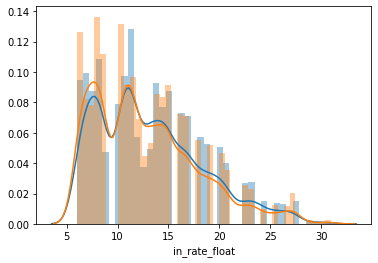

In [69]:
# Visualize
import seaborn as sns
sns.distplot(subordinates['in_rate_float'])
sns.distplot(managers['in_rate_float'])

## Convert the term column from string to integer

In [70]:
# Look to the term column
df['term'].head()

0     36 months
1     36 months
2     60 months
3     36 months
4     36 months
Name: term, dtype: object

In [71]:
# See the first value of term column
term0=df.loc[0, 'term']
term0

' 36 months'

In [72]:
# Write a function to remove the spaces and the word "months"
def term_2_int(mystring):
  return int(mystring.strip().strip(' months'))

#test the function
term_2_int(term0)

36

In [73]:
# Apply the function to the entire column
df['term_int']=df['term'].apply(term_2_int)
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'settlement_term', 'in_rate_float', 'int_rate_double',
       'emp_title_clean', 'emp_title_manager', 'issue_d_clean', 'year',
       'month', 'weekday', 'term_int'],
      dtype='object', length=153)

In [74]:
# Compare old and new columns
df[['term', 'term_int']].head()

,term,term_int
0,36 months,36
1,36 months,36
2,60 months,60
3,36 months,36
4,36 months,36


### Make the column named loan_status_is_great

In [75]:
# See unique values for column loan_status
df['loan_status'].unique()

array(['Fully Paid', 'Current', 'Late (16-30 days)', 'Charged Off',
       'Late (31-120 days)', 'In Grace Period', 'Default'], dtype=object)

In [0]:
# Create a function that operates on the rows of the dataset
def great_loan(row):
  if (row['loan_status']=="Fully Paid") | (row['loan_status']=="Current"):
    val = 1
  else:
    val = 0
  return val

# Apply the function
df['loan_status_is_great']=df.apply(great_loan, axis=1)

In [90]:
# Verify
df[['loan_status', 'loan_status_is_great']].sample(6)

,loan_status,loan_status_is_great
101586,Current,1
126062,Current,1
113588,Charged Off,0
45727,Current,1
68685,Current,1
123256,Current,1


### Make last_pymnt_d_month and last_pymnt_d_year columns

In [92]:
# Look at the last_pymnt_d column
df['last_pymnt_d'].head()

0    Aug-2019
1    Jul-2019
2    Oct-2019
3    Oct-2019
4    Oct-2019
Name: last_pymnt_d, dtype: object

In [0]:
# Convert these strings to dates
df['last_pymnt_d_clean']=pd.to_datetime(df['last_pymnt_d'], infer_datetime_format=True)

In [98]:
# Create last_pymnt_d_month and last_pymnt_d_year columns
df['last_pymnt_d_month']=df['last_pymnt_d_clean'].dt.month
df['last_pymnt_d_year']=df['last_pymnt_d_clean'].dt.year

# See the columns
df[['last_pymnt_d', 'last_pymnt_d_clean', 'last_pymnt_d_month', 'last_pymnt_d_year']].sample(5)

,last_pymnt_d,last_pymnt_d_clean,last_pymnt_d_month,last_pymnt_d_year
18721,Oct-2019,2019-10-01,10.0,2019.0
47366,Oct-2019,2019-10-01,10.0,2019.0
3737,Oct-2019,2019-10-01,10.0,2019.0
17375,Oct-2019,2019-10-01,10.0,2019.0
120012,Oct-2019,2019-10-01,10.0,2019.0


# Stretch Goals

You can do more with the LendingClub or Instacart datasets.

LendingClub options:
- There's one other column in the dataframe with percent signs. Remove them and convert to floats. You'll need to handle missing values.
- Modify the `emp_title` column to replace titles with 'Other' if the title is not in the top 20. 
- Take initiatve and work on your own ideas!

Instacart options:
- Read [Instacart Market Basket Analysis, Winner's Interview: 2nd place, Kazuki Onodera](http://blog.kaggle.com/2017/09/21/instacart-market-basket-analysis-winners-interview-2nd-place-kazuki-onodera/), especially the **Feature Engineering** section. (Can you choose one feature from his bulleted lists, and try to engineer it with pandas code?)
- Read and replicate parts of [Simple Exploration Notebook - Instacart](https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-instacart). (It's the Python Notebook with the most upvotes for this Kaggle competition.)
- Take initiative and work on your own ideas!

You can uncomment and run the cells below to re-download and extract the Instacart data

In [0]:
# !wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# !tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

In [0]:
# %cd instacart_2017_05_01